# Analyser les ventes d'un site de e-commerce spécialisé dans les livres

L'entreprise pour qui vous travaillez souhaite analyser les ventes de son site et mieux connaitre ses clients, ainsi que le détail des ventes de ses produits

Vous pourrez télécharger l'ensemble des données [via ce lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/dataset_P4.zip)  Les données que vous avez à disposition :   
* les ventes (appelées “Transactions”)  
* la liste des clients  
* la liste des produits.

## Corrélations des données

Vous allez réalisé l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais gardez en tête la mission gloable : nous souhaitons comprendre les ventes.

Vous devrez y utiliser au moins :

* Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
* Y a-t-il une corrélation entre l'âge des clients et :  
    Le montant total des achats ;  
    La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;  
    La taille du panier moyen (en nombre d’articles) ;  
    Les catégories de produits achetés.  

Il existe 3 corrélations possibles : 
* corrélation entre deux variables quantitatives : matrice de corrélation et heatmap sont souvent utilisés  
* corrélation entre une variable qualitative et une variable quantitative : [ANOVA](https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4774896-analysez-une-variable-quantitative-et-une-qualitative-par-anova)  
* corrélation entre deux variables qualitatives : [Chi-2](https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2)

## Nettoyage avant de commencer

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
transactions = pd.read_csv('datasets/transactions.csv')
customers = pd.read_csv('datasets/customers.csv')
products = pd.read_csv('datasets/products.csv')

In [419]:
transactions_copy = transactions.copy()
customers_copy = customers.copy()
products_copy = products.copy()

In [420]:
transactions = transactions.drop_duplicates()
transactions.duplicated().sum()

0

In [421]:
products_copy.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [422]:
transactions_copy = transactions_copy[~transactions_copy['date'].astype(str).str.contains("test", case=False, na=False)]

In [423]:
transactions_copy['date'] = pd.to_datetime(transactions_copy['date'])

In [424]:
transactions_copy.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [425]:
customers_copy['sex'] = pd.get_dummies(customers_copy['sex'], drop_first=True, dtype=int)

In [426]:
products_copy['price'].min()
products_copy['price'] = products_copy['price'].replace(-1,0) 

In [427]:
df_merge = customers_copy.merge(transactions_copy, on='client_id').merge(products_copy, on='id_prod')

In [428]:
from datetime import datetime
date_now = datetime.now().year
date_now

2025

In [429]:
df_merge['age'] = (date_now - df_merge['birth']).astype(int)

In [430]:
df_merge.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,0,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,58
1,c_4410,0,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,58
2,c_4410,0,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,58
3,c_4410,0,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,58
4,c_4410,0,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,58


In [431]:
df_merge['age'].dtypes

dtype('int64')

Y a-t-il une corrélation entre l'âge des clients et :
Le montant total des achats ;
La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
La taille du panier moyen (en nombre d’articles) ;
Les catégories de produits achetés.

In [432]:
df_merge['purchase_sum'] = df_merge.groupby('client_id')['price'].transform('sum')
#afficher le montant d'achat par ans des clients
#group by client id / age

In [433]:
df_merge.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,purchase_sum
0,c_4410,0,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,58,575.2
1,c_4410,0,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,58,575.2
2,c_4410,0,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,58,575.2
3,c_4410,0,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,58,575.2
4,c_4410,0,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,58,575.2


### Exercice 1 
Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [434]:
cont = df_merge[['sex', 'categ']].pivot_table(index='sex', columns='categ', aggfunc=len, margins=True, margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
0,103786,55469,8260,167515
1,105640,54266,9292,169198
Total,209426,109735,17552,336713


In [456]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_merge)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

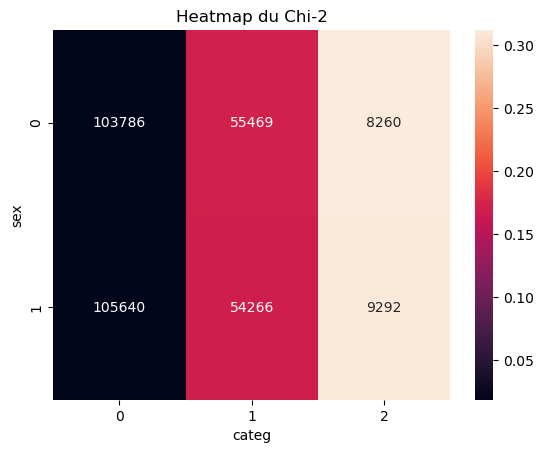

In [455]:
sns.heatmap(table.iloc[:-1,:-1], annot=c.iloc[:-1,:-1], fmt=".0f")
plt.xlabel("categ")
plt.ylabel("sex")
plt.title("Heatmap du Chi-2")
plt.show()

Les 2 colonnes sont des variables qualitatives, donc j'utilise le test du Chi-2 pour évaluer s'il existe une association entre elles. Ici, les résultats montrent qu'il n'y a pas d'association significative, donc on peut conclure qu'elles ne sont pas corrélées.

### Exercice 2
Y a-t-il une corrélation entre l'âge des clients et le montant total des achats 

In [436]:
corr = df_merge[['age', 'purchase_sum']].corr(method='pearson')
corr

,age,purchase_sum
age,1.000000,-0.051881
purchase_sum,-0.051881,1.000000


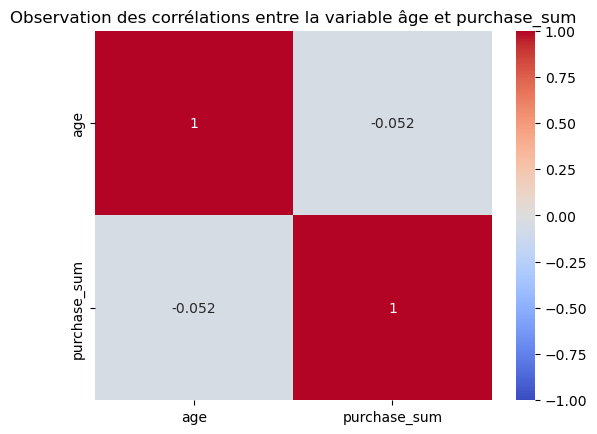

In [437]:
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Observation des corrélations entre la variable âge et purchase_sum')
plt.show()

Les deux colonnes sont des variables quantitatives, donc j'utilise un heatmap basé sur la corrélation de Pearson pour évaluer la relation entre elles. Ici, le coefficient de corrélation est faible, donc une absence de lien entre les deux variables.

### Exercice 3
Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois par exemple) 

In [438]:
df_merge['purchase_month'] = df_merge['date'].dt.to_period('M')
df_merge['number_of_purchases'] = df_merge.groupby(['client_id', 'purchase_month'])['date'].transform('count')

In [439]:
df_merge.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,purchase_sum,purchase_month,number_of_purchases
0,c_4410,0,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,58,575.2,2021-03,7
1,c_4410,0,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,58,575.2,2021-09,7
2,c_4410,0,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,58,575.2,2022-01,4
3,c_4410,0,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,58,575.2,2021-07,1
4,c_4410,0,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,58,575.2,2021-11,2


In [440]:
corr2 = df_merge[['age', 'number_of_purchases']].corr(method='pearson')

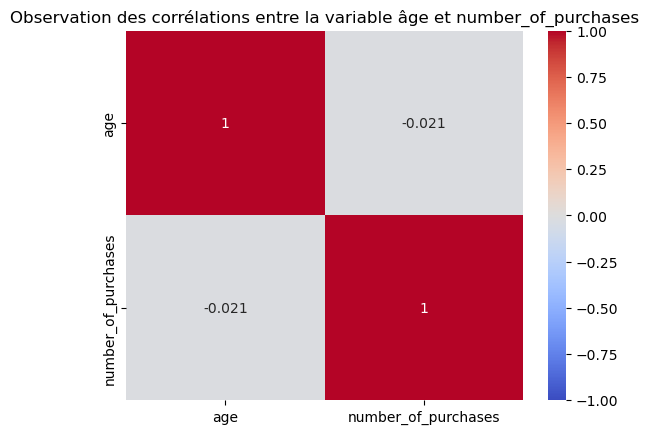

In [441]:
sns.heatmap(corr2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Observation des corrélations entre la variable âge et number_of_purchases')
plt.show()

Les deux colonnes sont des variables quantitatives, donc j'utilise un heatmap basé sur la corrélation de Pearson pour évaluer la relation entre elles. Ici, le coefficient de corrélation est faible, donc une absence de lien entre les deux variables.

### Exercice 4
Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles)

In [446]:
df_merge.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,purchase_sum,purchase_month,number_of_purchases,basket_mean
0,c_4410,0,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,58,575.2,2021-03,7,1.44
1,c_4410,0,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,58,575.2,2021-09,7,1.44
2,c_4410,0,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,58,575.2,2022-01,4,1.44
3,c_4410,0,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,58,575.2,2021-07,1,1.44
4,c_4410,0,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,58,575.2,2021-11,2,1.44


In [443]:
session = df_merge.groupby(['client_id','session_id'])['id_prod'].count() #nombre d’articles par session

basket_mean = session.groupby('client_id').mean().reset_index(name='basket_mean')
df_merge = df_merge.merge(basket_mean, on='client_id')

In [448]:
corr3 = df_merge[['age', 'basket_mean']].corr(method='pearson')

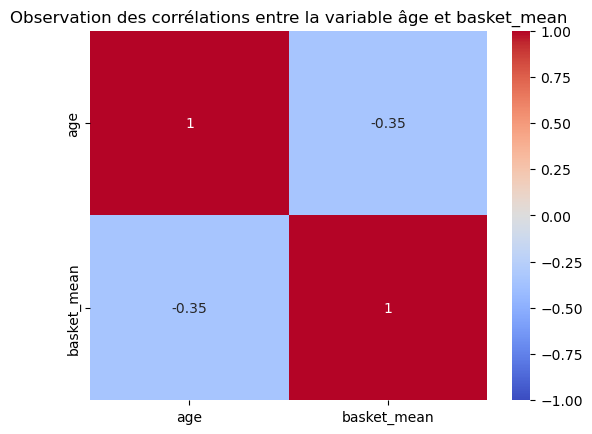

In [449]:
sns.heatmap(corr3, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Observation des corrélations entre la variable âge et basket_mean')
plt.show()

Les deux colonnes sont des variables quantitatives, donc j'utilise un heatmap basé sur la corrélation de Pearson pour évaluer la relation entre elles. 
Ici, le coefficient de corrélation est moyen (-0.35), donc plus le client est agé et moins il achète de produit.

### Exercice 5
Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés.

In [465]:
X = "categ" # qualitative
Y = "age" # quantitative
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_merge[X],df_merge[Y])

0.11886832303683538

/var/folders/yv/8by5j12562l7ncz_wsnb_6_w0000gn/T/ipykernel_5318/741566502.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,


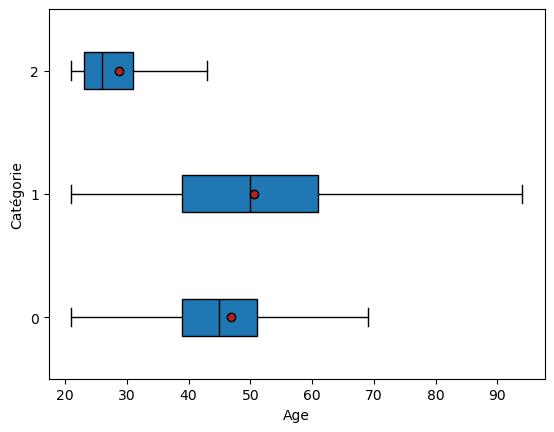

In [468]:
modalites = df_merge[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_merge[df_merge[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('Age')
plt.ylabel('Catégorie')
plt.show()

Comme une de mes variables est qualitative (categ) et l’autre quantitative (age), j’ai utilisé l’anova.
Il semble y avoir une légère relation, on voit que les clients les plus jeunes (entre 20 et 30 ans) achètent davantage dans la catégorie 2, et ceux âgés de 40 à 60 ans préfèrent plutôt les catégories 0 et 1.